In [1]:
import pandas as pd
import matplotlib
import seaborn as sns

In [4]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)
sns.set(style='whitegrid',palette='autumn')

In [5]:
data=pd.read_csv('Market_Basket_Optimisation.csv',header=None,prefix='item_')
data.head()

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_0   7501 non-null   object
 1   item_1   5747 non-null   object
 2   item_2   4389 non-null   object
 3   item_3   3345 non-null   object
 4   item_4   2529 non-null   object
 5   item_5   1864 non-null   object
 6   item_6   1369 non-null   object
 7   item_7   981 non-null    object
 8   item_8   654 non-null    object
 9   item_9   395 non-null    object
 10  item_10  256 non-null    object
 11  item_11  154 non-null    object
 12  item_12  87 non-null     object
 13  item_13  47 non-null     object
 14  item_14  25 non-null     object
 15  item_15  8 non-null      object
 16  item_16  4 non-null      object
 17  item_17  4 non-null      object
 18  item_18  3 non-null      object
 19  item_19  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [7]:
sorted(data.melt()['value'].dropna().unique())[:5]


[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado']

In [8]:
for col in data.columns:
    data[col]=data[col].str.strip()
    
sorted(data.melt()['value'].dropna().unique())[:5]

['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food']

In [10]:
print(f'there were a total of {data.shape[0]:,}transactios,involving items ranging from' +f'{data.shape[1]} to {data.notna().sum(axis=1).min()}.')


there were a total of 7,501transactios,involving items ranging from20 to 1.


In [11]:
all_items=data.melt()['value'].dropna()
print(f'There were {all_items.nunique()} different products:\n')
print(sorted(all_items.unique()))

There were 119 different products:

['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons

Text(0, 0.5, 'Count')

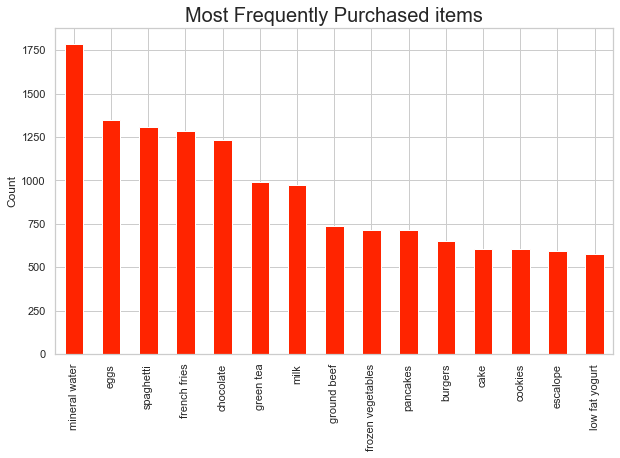

In [13]:
ax=all_items.value_counts().head(15).plot(kind='bar')
ax.set_title("Most Frequently Purchased items",size=20)
ax.set_ylabel("Count")

In [14]:
basket_size=data.notna().apply(sum,axis=1)

ax.set_title("Distribution of basket size",size=20)
ax.set_ylabel("Count")
ax.set_xlabel("Number of item in the single transaction")


Text(0.5, 3.1999999999999886, 'Number of item in the single transaction')

In [15]:
basket_size.nlargest(10)

0       20
1111    19
1120    19
1623    18
1604    16
1707    16
2358    16
2489    16
1186    15
1613    15
dtype: int64

Text(0, 0.5, 'No. of transaction (out of 8)')

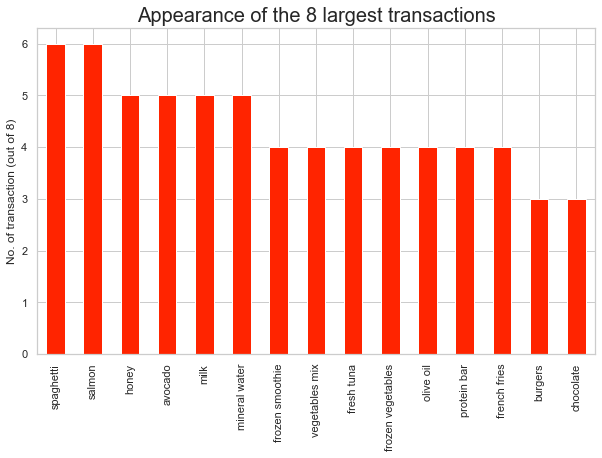

In [16]:
largest_transactions=data[basket_size >15]
item_in_largest_transactions =largest_transactions.melt()['value'].dropna()
ax=item_in_largest_transactions.value_counts().head(15).plot(kind='bar')
ax.set_title("Appearance of the 8 largest transactions",size=20)
ax.set_ylabel("No. of transaction (out of 8)")

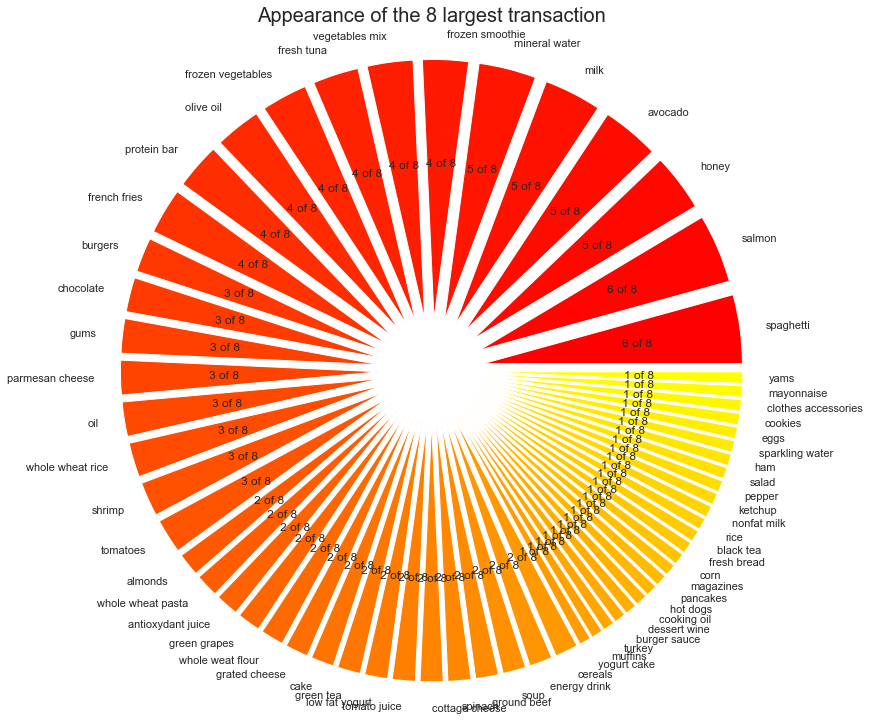

In [18]:
pie_data=item_in_largest_transactions.value_counts()
ax= pie_data.plot.pie(cmap='autumn',explode=[0.2]*61, figsize=(12,12),autopct=lambda pct: f'{pct * 0.01 *pie_data.sum():.0f} of 8')
ax.set_title("Appearance of the 8 largest transaction",size=20,pad=25)
ax.set_ylabel("")
ax.figure.tight_layout()

Text(0, 0.5, 'No. of times bought alone')

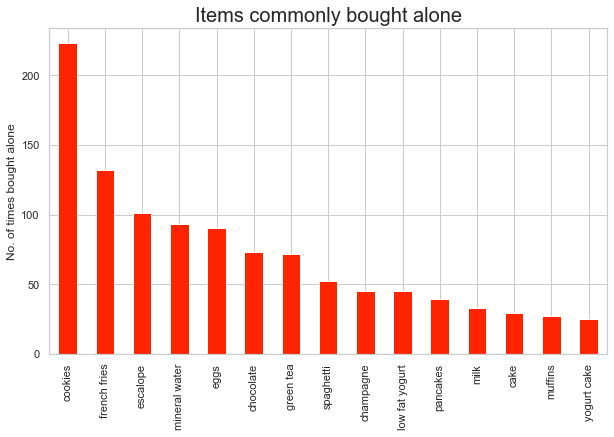

In [20]:
single_items=data[basket_size==1]['item_0'].value_counts()
ax=single_items.head(15).plot.bar()
ax.set_title("Items commonly bought alone",size=20)
ax.set_ylabel("No. of times bought alone")

In [21]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=84fe49279eb098bf359c4d2a1190cc8072b35517329eec4c9d9f16de5bad5bc6
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\cb\f6\e1\57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [25]:
baskets=[set(row.dropna()) for _,row in data.iterrows() if row.dropna().size >1]
baskets[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [26]:
import apyori
association_rules=apyori.apriori(baskets,min_support=0.03,min_confidence=0.3)

for rule in association_rules:
    items=list(rule.items)
    print(f'{items[:-1]}--> [{items[-1]}] Support: {rule.support:g}' + f'Confidence: {rule.ordered_statistics[0].confidence:g}') 

['eggs']--> [burgers] Support: 0.0375848Confidence: 0.340694
['mineral water']--> [cake] Support: 0.0358448Confidence: 0.355786
['chocolate']--> [mineral water] Support: 0.0687315Confidence: 0.341696
['mineral water']--> [eggs] Support: 0.0664695Confidence: 0.303657
['mineral water']--> [frozen vegetables] Support: 0.046633Confidence: 0.385057
['spaghetti']--> [frozen vegetables] Support: 0.0363668Confidence: 0.300287
['mineral water']--> [ground beef] Support: 0.0534192Confidence: 0.428771
['ground beef']--> [spaghetti] Support: 0.0511571Confidence: 0.410615
['mineral water']--> [low fat yogurt] Support: 0.0313207Confidence: 0.340265
['milk']--> [mineral water] Support: 0.0626414Confidence: 0.383387
['mineral water']--> [olive oil] Support: 0.0360188Confidence: 0.43949
['mineral water']--> [pancakes] Support: 0.044023Confidence: 0.375371
['mineral water']--> [shrimp] Support: 0.0307987Confidence: 0.33908
['mineral water']--> [soup] Support: 0.0301027Confidence: 0.466307
['mineral wate